In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import matthews_corrcoef 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/MyDrive/'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(file_path+'alldata.csv')
df.head()

,category,mir,disease,pmid,description
0,circulation_biomarker_diagnosis_down,hsa-mir-15a,"Leukemia, Lymphocytic, Chronic, B-Cell",15737576,Some human miRNAs are linked to leukemias: the...
1,circulation_biomarker_diagnosis_down,hsa-mir-16,"Leukemia, Lymphocytic, Chronic, B-Cell",15737576,Some human miRNAs are linked to leukemias: the...
2,circulation_biomarker_diagnosis_down,hsa-mir-143,Colon Neoplasms,16195701,downregulation
3,circulation_biomarker_diagnosis_down,hsa-mir-145,Colon Neoplasms,16195701,downregulation
4,circulation_biomarker_diagnosis_down,hsa-mir-223,"Leukemia, Lymphocytic, Chronic, B-Cell",16251535,downregulated


In [ ]:
df['mir'] = df['mir'].str.lower()
df['disease'] = df['disease'].str.lower()

In [ ]:
mirna_array = df['mir'].unique()
disease_array = df['disease'].unique()

In [ ]:
print('miRNA length:  ', len(mirna_array))
# print(mirna_array)
print('disease length:', len(disease_array))
# print(disease_array)

miRNA length:   1206
disease length: 894


In [ ]:
mirna_array.sort()
disease_array.sort()

In [ ]:
mirna_to_id = dict()
idx = 0
for x in mirna_array:
  mirna_to_id[x] = idx
  idx += 1

disease_to_id = dict()
idx = 0
for x in disease_array:
  disease_to_id[x] = idx
  idx += 1

In [ ]:
print(mirna_to_id)

{'hsa-let-7': 0, 'hsa-let-7a': 1, 'hsa-let-7a-1': 2, 'hsa-let-7a-2': 3, 'hsa-let-7a-3': 4, 'hsa-let-7b': 5, 'hsa-let-7c': 6, 'hsa-let-7d': 7, 'hsa-let-7e': 8, 'hsa-let-7f': 9, 'hsa-let-7f-1': 10, 'hsa-let-7f-2': 11, 'hsa-let-7g': 12, 'hsa-let-7i': 13, 'hsa-mir-1': 14, 'hsa-mir-1-1': 15, 'hsa-mir-1-2': 16, 'hsa-mir-10': 17, 'hsa-mir-100': 18, 'hsa-mir-101': 19, 'hsa-mir-101-1': 20, 'hsa-mir-101-2': 21, 'hsa-mir-101a': 22, 'hsa-mir-103': 23, 'hsa-mir-103-1': 24, 'hsa-mir-103-2': 25, 'hsa-mir-103a': 26, 'hsa-mir-103a-1': 27, 'hsa-mir-103a-2': 28, 'hsa-mir-103b': 29, 'hsa-mir-103b-1': 30, 'hsa-mir-103b-2': 31, 'hsa-mir-105': 32, 'hsa-mir-105-1': 33, 'hsa-mir-105-2': 34, 'hsa-mir-106': 35, 'hsa-mir-106a': 36, 'hsa-mir-106b': 37, 'hsa-mir-107': 38, 'hsa-mir-10a': 39, 'hsa-mir-10b': 40, 'hsa-mir-112': 41, 'hsa-mir-1165': 42, 'hsa-mir-1178': 43, 'hsa-mir-1179': 44, 'hsa-mir-1180': 45, 'hsa-mir-1181': 46, 'hsa-mir-1182': 47, 'hsa-mir-1183': 48, 'hsa-mir-1184': 49, 'hsa-mir-1184-1': 50, 'hsa-mir

In [ ]:
connectivity=np.zeros((len(disease_to_id), len(mirna_to_id)))

In [ ]:
for i in range(len(df)):
  connectivity[disease_to_id[df.loc[i, 'disease']]][mirna_to_id[df.loc[i, 'mir']]]=1

In [ ]:
f_l=np.zeros(len(mirna_to_id))
K_d=np.zeros(len(disease_to_id))
sets_of_mirna=[]
for i in range(len(connectivity)):
  cur_set=set()
  for j in range(len(connectivity[i])):
    if(connectivity[i][j]==1):
      f_l[j]+=1
      K_d[i]+=1
      cur_set.add(j)
  sets_of_mirna.append(cur_set)
f_l=1/f_l
f_s=1/K_d

In [ ]:
M=np.zeros((len(disease_to_id), len(disease_to_id)))
for i in range(len(disease_to_id)):
  for j in range(len(disease_to_id)):
    z=sets_of_mirna[i].intersection(sets_of_mirna[j])
    M[i][j]=len(z)

In [ ]:
print(M)

[[ 7.  0.  0. ...  0.  0.  0.]
 [ 0.  2.  0. ...  0.  0.  0.]
 [ 0.  0. 13. ...  2.  1.  1.]
 ...
 [ 0.  0.  2. ...  3.  1.  1.]
 [ 0.  0.  1. ...  1. 11.  1.]
 [ 0.  0.  1. ...  1.  1.  1.]]


In [ ]:
f_o=np.zeros((len(disease_to_id), len(disease_to_id)))
for i in range(len(disease_to_id)):
  for j in range(len(disease_to_id)):
    f_o[i][j]=K_d[i]-M[i][j]+1
f_o=1/f_o
print(f_o)

[[1.         0.125      0.125      ... 0.125      0.125      0.125     ]
 [0.33333333 1.         0.33333333 ... 0.33333333 0.33333333 0.33333333]
 [0.07142857 0.07142857 1.         ... 0.08333333 0.07692308 0.07692308]
 ...
 [0.25       0.25       0.5        ... 1.         0.33333333 0.33333333]
 [0.08333333 0.08333333 0.09090909 ... 0.09090909 1.         0.09090909]
 [0.5        0.5        1.         ... 1.         1.         1.        ]]


In [ ]:
sig=np.zeros((len(disease_to_id), len(disease_to_id)))
for i in range(len(disease_to_id)):
  for j in range(len(disease_to_id)):
    sum=0
    z=sets_of_mirna[i].intersection(sets_of_mirna[j])
    for k in z:
      sum+=f_l[k]
    sig[i][j]=f_s[i]*f_o[j][i]*sum
print(sig)

[[1.62071217e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.03184713e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.00566252e-02 ... 2.99544692e-04
  2.17850685e-05 2.39635754e-04]
 ...
 [0.00000000e+00 0.00000000e+00 2.16337833e-04 ... 1.92627207e-02
  9.44019636e-05 1.03842160e-03]
 [0.00000000e+00 0.00000000e+00 2.17850685e-05 ... 9.44019636e-05
  1.76436724e-02 2.83205891e-04]
 [0.00000000e+00 0.00000000e+00 2.39635754e-04 ... 1.03842160e-03
  2.83205891e-04 3.11526480e-03]]


In [ ]:
rating=sig@connectivity

In [ ]:
print(rating)

[[3.33987510e-03 4.95300402e-03 1.69172673e-03 ... 2.81157418e-03
  1.65424664e-03 2.79017857e-05]
 [1.56885385e-03 2.31201956e-03 8.18383223e-04 ... 1.09140384e-03
  4.97090693e-04 0.00000000e+00]
 [3.06378811e-03 4.56833367e-03 2.91921839e-03 ... 2.77724719e-03
  1.50708756e-03 4.08160084e-05]
 ...
 [4.07430178e-03 4.89210603e-03 2.05647767e-03 ... 2.60030737e-03
  1.62654545e-03 8.37436774e-05]
 [3.25954966e-03 5.03941817e-03 2.76180476e-03 ... 3.30241179e-03
  1.57593079e-03 4.20856887e-05]
 [3.49251360e-03 5.42348543e-03 2.36209343e-03 ... 2.45772520e-03
  1.18944157e-03 9.73520249e-05]]


In [ ]:
minn, maxx = 1000000000, -10000000000
for i in range(len(rating)):
  for j in range(len(rating[0])):
    if(rating[i][j] > 0):
      minn = min(minn, rating[i][j])
      maxx = max(maxx, rating[i][j])

In [ ]:
print(minn, maxx)

1.5346132007427527e-06 1.0


In [ ]:
number_of_points = 50

In [ ]:
delta_t = ((maxx - minn) / (number_of_points * 10))
print(delta_t)

0.0019999969307735984


In [ ]:
print(len(rating), len(rating[0]))

894 1206


In [ ]:
fpr_arr, tpr_arr = list(), list()
for step in range(number_of_points):
  thres = minn + ((step+1)*delta_t)
  print('threshold:', thres)
  tp, tn, fp, fn = 0, 0, 0, 0
  for i in range(len(rating)):
    for j in range(len(rating[0])):
      if(rating[i][j] < thres and connectivity[i][j] == 1):
        tp += 1
      elif(rating[i][j] < thres and connectivity[i][j] == 0):
        fp += 1
      elif(rating[i][j] >= thres and connectivity[i][j] == 1):
        fn += 1
      elif(rating[i][j] >= thres and connectivity[i][j] == 0):
        tn += 1
  fpr, tpr = fp/(fp + tn), tp/(fp + fn)
  if(tpr > 0 and fpr>0):
    print('fpr:', fpr, 'tpr:', tpr)
    fpr_arr.append(fpr), tpr_arr.append(tpr)

threshold: 0.0020015315439743412
threshold: 0.00400152847474794
threshold: 0.006001525405521538
threshold: 0.008001522336295136
threshold: 0.010001519267068734
threshold: 0.012001516197842333
threshold: 0.014001513128615932
fpr: 0.9991391613619374 tpr: 9.28288764642595e-07
threshold: 0.016001510059389528
fpr: 0.9994440417129179 tpr: 7.4241323277346095e-06
threshold: 0.018001506990163126
fpr: 0.999646980646233 tpr: 3.2474913129607376e-05
threshold: 0.020001503920936723
fpr: 0.9997744074183147 tpr: 0.00011968869804675467
threshold: 0.022001500851710324
fpr: 0.9998461439714866 tpr: 0.00028672385059924356
threshold: 0.02400149778248392
fpr: 0.9998980585823347 tpr: 0.0005317949331915214
threshold: 0.02600149471325752
fpr: 0.999952804899229 tpr: 0.0008587165297826101
threshold: 0.02800149164403112
fpr: 0.999959412213337 tpr: 0.0012723461598828326
threshold: 0.030001488574804717
fpr: 0.9999754585475991 tpr: 0.0016890887468410882
threshold: 0.03200148550557832
fpr: 0.9999896170778304 tpr: 0.00

In [ ]:
from matplotlib import pyplot as plt

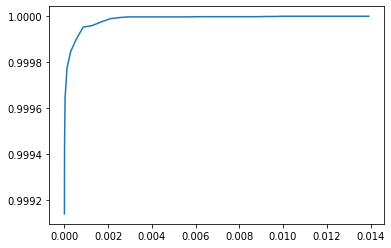

In [ ]:
plt.plot(tpr_arr, fpr_arr)
plt.show()